In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[ 8.79095554,  3.13572241],
       [-4.58667947, -1.88028515],
       [-3.65025507, -3.49677001],
       ...,
       [ 9.01060204,  3.95213739],
       [-3.49850889, -4.18966805],
       [-3.3450291 , -3.0419602 ]], shape=(1000, 2))

In [4]:
y

array([1, 2, 2, 2, 1, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 2, 1,
       2, 1, 1, 2, 0, 1, 0, 1, 0, 2, 0, 2, 1, 1, 1, 0, 1, 2, 1, 2, 2, 1,
       1, 1, 1, 0, 0, 1, 2, 0, 2, 2, 0, 2, 2, 2, 0, 1, 0, 1, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 1, 1, 0, 0, 0, 1, 2, 0, 1, 2, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 2, 0, 1, 2, 0, 0, 0, 2, 1, 1,
       0, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 1, 1, 1, 2, 2, 0,
       0, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0,
       2, 0, 0, 2, 1, 1, 2, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 1, 2,
       0, 0, 0, 0, 2, 0, 2, 1, 1, 2, 1, 1, 0, 0, 2, 2, 2, 2, 2, 1, 0, 2,
       1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 1, 2,
       0, 1, 0, 1, 0, 0, 0, 2, 0, 1, 2, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0,
       2, 1, 2, 2, 0, 0, 1, 2, 1, 1, 1, 0, 1, 0, 2, 1, 2, 1, 2, 1, 0, 2,
       0, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 0, 2, 1, 2, 1, 2, 0, 1, 0, 0, 0,
       2, 1, 2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 2, 0,

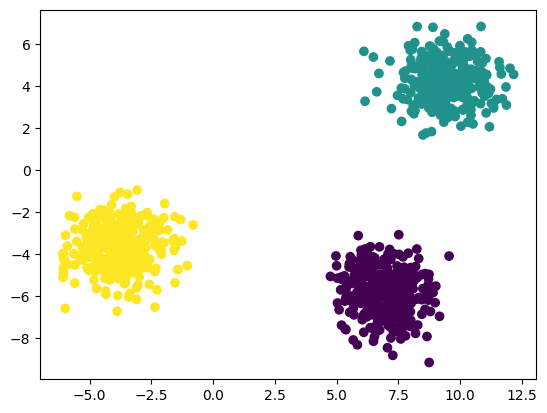

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
## Standardization -- Feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [10]:
X_train_scaled

array([[ 0.55146041, -1.0383893 ],
       [ 0.72438058,  1.57740169],
       [ 0.78865462,  1.74275352],
       ...,
       [ 0.60418798,  1.17332873],
       [ 0.30746291, -0.90668827],
       [ 0.64127356,  1.74641325]], shape=(670, 2))

In [12]:
from sklearn.cluster import KMeans

In [13]:
## Elbow Method to select the k value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [14]:
wcss

[1340.0,
 472.3302889744896,
 55.6048911694123,
 46.74160043833772,
 39.04678574911967,
 31.05829857350296,
 28.95772965459069,
 25.937940147653595,
 22.686392283715172,
 21.230808722084696]

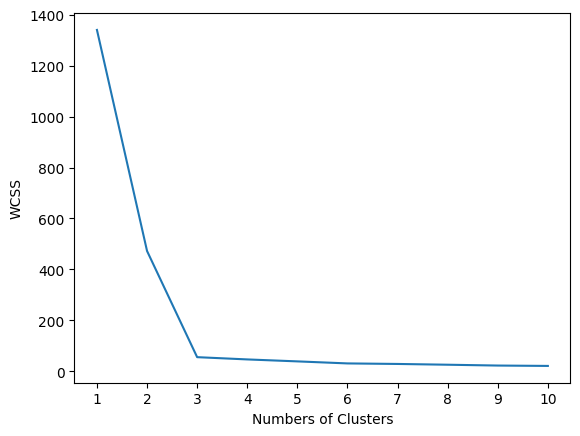

In [15]:
## Plot Elbow Curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Numbers of Clusters")
plt.ylabel("WCSS")
plt.show()